# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind_from_stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The sample does not show normal distribution, so we should careful with our interpretation of the summary statisics (they are not incorrect, but should be used cautiously).

In [5]:
#calculate mean:
sample_mean = np.mean(medical.charges)

#ddof=1, because we are trying to draw conclusions about a larger population from this sample:
sample_std = np.std(medical.charges, ddof=1)
(sample_mean, sample_std)


(13270.422265141257, 12110.011236693994)

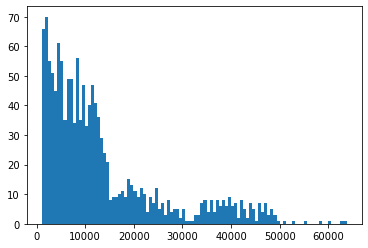

In [8]:
plt.hist(medical.charges, bins=100)
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 

Although the data is clearly very right skewed (and not normally distributed), we can justify our usage of t- and z-statistics because the data meets the criteria for use with CLT. This includes:

1) The sample represents a random sample.

2) Each observation is an independent event.

3) The sample size is large.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ For this scenario, a one-sided confidence interval would be appropriate because the administrator's concern is one-directional (only that the average charges fall below a certain threshold, but not that they exceed a particular threshold.

In [11]:
# One-sided confidence interval, therefore, p=0.05
p = 0.05
#Sample size = 1338, or, the first parameter of medical.shape()
sample_size = medical.shape[0]
#we'll use n-1 (as opposed to n) because we're using a sample to make assumptions about a larger population
df = sample_size - 1  # degrees of freedom 

t_critical = t.ppf(p, df)
print("The critical t value is", t_critical)

The critical t value is -1.6459941145571324


In [12]:
# Margin of Error:
# moe = critical_value * standard_error

standard_error = sample_std / (np.sqrt(sample_size))
margin = t_critical *  standard_error
print('The margin of error is', margin)

The margin of error is -544.9350813250253


In [14]:
#Calculate sample mean:
interval_lower_bound = sample_mean + margin
print(interval_lower_bound)

12725.48718381623


In [24]:
print('The sample mean is', sample_mean,'.')
print('With a margin of error of', margin, 'the lowest boundary of the 95% confidence interval lies at', interval_lower_bound)
print('Therefore, the administrator should not worry.')

The sample mean is 13270.422265141257 .
With a margin of error of -544.9350813250253 the lowest boundary of the 95% confidence interval lies at 12725.48718381623
Therefore, the administrator should not worry.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ We will have to assume that the variations in each subgroup of the sample set are identical. The null hypothesis is that there is no difference between the amount insured and uninsured patients are charged. The alternative hypothesis would be that there IS a difference between the amount insured and uninsured patients are charged.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

### Manual Approach:

In [25]:
# groupby insurance claim and find the row with(1) or without(0) insurance claims
grouped = medical.groupby('insuranceclaim')

# # # Calculating different statistics: 

# Calculate n (sample size) 
# (get the first value of the Series) 
# n0 --> no insurance
# n1 --> yes insurance 
n0 = grouped.count().loc[0][0]
n1 = grouped.count().loc[1][0]

# Calculate the mean
x0 = grouped.mean().loc[0,'charges']
x1 = grouped.mean().loc[1,'charges']


# Calculate the standard deviation
s0 = grouped.std().loc[0,'charges']
s1 = grouped.std().loc[1,'charges']

In [26]:
# Calculate pooled standard deviation using formula sp above:

std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))
print("The pooled standard deviation is", std_pool)

The pooled standard deviation is 11520.034268775256


In [27]:
# Calculate t-statistic using formula t above:

t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t-statistic is", t_critical)

The t-statistic is -11.89329903087671


In [28]:
# Calculate the p-value from t-statistic
p_value = t.cdf(t_critical, n0+n1-2)
print("The p-value given the null hypothesis is true is", p_value)

The p-value given the null hypothesis is true is 2.230615115810486e-31


### Using scipy stats:

In [39]:
# ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True)
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)

In [44]:
print('Using scipy.stats gives us a t-statistic of:', t_critical_stats, 'and a  p-value of:', p_value_stats)

Using scipy.stats gives us a t-statistic of: -11.893299030876712 and a  p-value of: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I do not see an equivalent for performing a z-test, but it appears that statsmodels has an api call for z-tests

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test

Side note: If two groups have unequal variances (heteroscedastic), then perform Welch's t-test

t_critical_welch, p_value_welch = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=False)

print("Using the scipy.stats function to conduct t-test for two independent samples\
 with unequal variances gives us t critical value of: {} and P-value of {}".format(t_critical_welch, p_value_welch))